<a href="https://colab.research.google.com/github/nidhi299/Data-Science/blob/main/Stock_Price_Prediction(LSTM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**20MAI0020- Nidhi Ghuble**(https://github.com/nidhi2399)

## **GOOGLE STOCK PRICE PREDICTION:**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Importing the training set
dataset_train = pd.read_csv('/content/drive/MyDrive/Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [ ]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
# Part 2 - Building the RNN

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

In [ ]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
38/38 [==============================] - 10s 107ms/step - loss: 0.0968
Epoch 2/10
38/38 [==============================] - 4s 111ms/step - loss: 0.0067
Epoch 3/10
38/38 [==============================] - 4s 112ms/step - loss: 0.0057
Epoch 4/10
38/38 [==============================] - 4s 113ms/step - loss: 0.0055
Epoch 5/10
38/38 [==============================] - 4s 112ms/step - loss: 0.0053
Epoch 6/10
38/38 [==============================] - 4s 114ms/step - loss: 0.0047
Epoch 7/10
38/38 [==============================] - 4s 112ms/step - loss: 0.0043
Epoch 8/10
38/38 [==============================] - 4s 115ms/step - loss: 0.0051
Epoch 9/10
38/38 [==============================] - 4s 115ms/step - loss: 0.0065
Epoch 10/10
38/38 [==============================] - 4s 114ms/step - loss: 0.0056


In [ ]:
# Loading data
dataset_test = pd.read_csv('/content/drive/MyDrive/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [ ]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

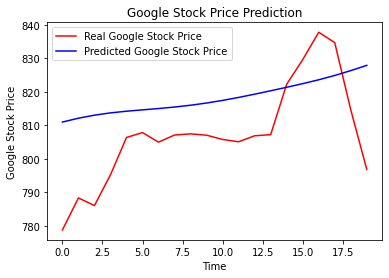

In [ ]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score
x = r2_score(real_stock_price, predicted_stock_price)
print("Accuracy :",x)

Accuracy : -0.1969377410524369
